Visualizes fitness over time
Fitness := number of food collected / number of agents

In [112]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

elitism_rate = 0.2
population_size = 100
num_elite = int(elitism_rate*population_size)

raw_values = []
avg_fitness_values = []
worst_fitness_values = []
elite_fitness_values = []
randomAgent_files = ['Final/GA_5RandomAgent_2tile_0.1mutation_40food_20blocks', 
                     'Final/GA_10RandomAgent_2tile_0.1mutation_40food_20blocks',
                     'Final/GA_15RandomAgent_2tile_0.1mutation_40food_20blocks']
swarmAgent_files = ['Final/GA_5SwarmAgent_2tile_0.1mutation_40food_20blocks', 
                     'Final/GA_10SwarmAgent_2tile_0.1mutation_40food_20blocks',
                     'Final/GA_15SwarmAgent_2tile_0.1mutation_40food_20blocks']
DQNAgent_files = ['Final/GA_5DQNAgent_2tile_0.1mutation_40food_20blocks', 
                     'Final/GA_10DQNAgent_2tile_0.1mutation_40food_20blocks']
swarmAgent_files_heatmap = ['Final/GA_5SwarmAgent_1tile_0.1mutation_40food_20blocks', 
                    'Final/GA_5SwarmAgent_2tile_0.1mutation_40food_20blocks',
                    'Final/GA_5SwarmAgent_3tile_0.1mutation_40food_20blocks']
swarmAgent_files_heatmap_2 = ['Final/GA_5SwarmAgent_2tile_0.1mutation_40food_20blocks', 
                    'Final/GA_5SwarmAgent_2tile_0.2mutation_40food_20blocks']
swarmAgent_files_heatmap_barriers = ['Final/new_GA_5SwarmAgent_2tile_0.1mutation_40food_10blocks',
                    'Final/new_GA_5SwarmAgent_2tile_0.1mutation_40food_20blocks',
                    'Final/new_GA_5SwarmAgent_2tile_0.1mutation_40food_30blocks']
swarmAgent_files_heatmap_food = ['Final/GA_5SwarmAgent_2tile_0.1mutation_20food_20blocks',
                    'Final/new_GA_5SwarmAgent_2tile_0.1mutation_40food_20blocks',
                    'Final/GA_5SwarmAgent_2tile_0.1mutation_60food_20blocks']

DQNAgent_files_heatmap_food = ['Final/GA_5DQNAgent_2tile_0.1mutation_20food_20blocks',
                    'Final/GA_5DQNAgent_2tile_0.1mutation_40food_20blocks',
                    'Final/GA_5DQNAgent_2tile_0.1mutation_60food_20blocks']
DQNAgent_files_heatmap_tile = ['Final/GA_5DQNAgent_1tile_0.1mutation_40food_20blocks',
                    'Final/GA_5DQNAgent_2tile_0.1mutation_40food_20blocks',
                    'Final/GA_5DQNAgent_3tile_0.1mutation_40food_20blocks']

# legend = ['5 agents', '10 agents', '15 agents']
legend = ['5 agents', '10 agents']
# legend = ['2 tiles 0.1 mutation', '2 tiles 0.2 mutation']
# legend = ['10 barriers', '20 barriers', '30 barriers']
# legend = ['20 food', '40 food', '60 food']
# legend = ['1 tile', '2 tiles', '3 tiles']
agent_type = 'DQNAgent'
file_name = '_numAgents'
for file in DQNAgent_files:
    with open(file, 'rb') as f:
        temp_values = pickle.load(f)
    raw_values.append(temp_values)
    raw_fitness_values = temp_values['fitness values']

    avg_fitness_values.append([1*sum(i)/len(i) for i in raw_fitness_values])
    worst_fitness_values.append([1*max(i) for i in raw_fitness_values])
    elite_fitness_values.append([1*sum(i[:num_elite])/num_elite for i in raw_fitness_values])

df_avg_fitness = pd.DataFrame(avg_fitness_values, legend).transpose()
df_worst_fitness = pd.DataFrame(worst_fitness_values, legend).transpose()
df_elite_fitness = pd.DataFrame(elite_fitness_values, legend).transpose()

{'coding_dict': {'empty': 0, 'agent': 1, 'bounds': 2, 'hive': 3, 'blockade': 4, 'food_start': 6}, 'N': 12, 'M': 12, 'max_food': 5, 'observation_radius': 1, 'steps': 300, 'spawn_rate': 2, 'pheromone': {'evaporation': 0.05, 'diffusion': 0.1, 'step': 0.1, 'step_if_food': 0.3, 'cap': 5}, 'grid': {'food': 40, 'blockade': 20}, 'env_actions': [(0, 0), (0, -1), (0, 1), (1, 0), (-1, 0)], 'rgb_coding': {0: [0, 0, 0], 1: [150, 0, 150], 2: [100, 100, 100], 3: [150, 150, 0], 4: [45, 0, 255], 5: [0, 255, 45], 6: (0, 250, 50), 7: (0, 245, 55), 8: (0, 240, 60), 9: (0, 235, 65), 10: (0, 230, 70), 11: (0, 225, 75), 12: (0, 220, 80), 13: (0, 215, 85), 14: (0, 210, 90)}}


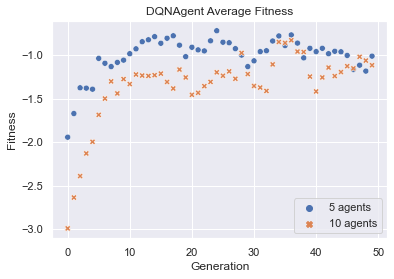

In [113]:
sns.set(style='darkgrid')
ax = sns.scatterplot(data=df_avg_fitness)
plt.title(agent_type + ' Average Fitness')

# Set x-axis label
plt.xlabel('Generation')
# Set y-axis label
plt.ylabel('Fitness')
# Set legend
# plt.legend(title='Barriers', labels=['20', '30'])

print(raw_values[0]['env_params'])
# plt.savefig('Final/Plots/' + agent_type + file_name + '_avg_fitness.png')

{'coding_dict': {'empty': 0, 'agent': 1, 'bounds': 2, 'hive': 3, 'blockade': 4, 'food_start': 6}, 'N': 12, 'M': 12, 'max_food': 5, 'observation_radius': 1, 'steps': 300, 'spawn_rate': 2, 'pheromone': {'evaporation': 0.05, 'diffusion': 0.1, 'step': 0.1, 'step_if_food': 0.3, 'cap': 5}, 'grid': {'food': 20, 'blockade': 20}, 'env_actions': [(0, 0), (0, -1), (0, 1), (1, 0), (-1, 0)], 'rgb_coding': {0: [0, 0, 0], 1: [150, 0, 150], 2: [100, 100, 100], 3: [150, 150, 0], 4: [45, 0, 255], 5: [0, 255, 45], 6: (0, 250, 50), 7: (0, 245, 55), 8: (0, 240, 60), 9: (0, 235, 65), 10: (0, 230, 70), 11: (0, 225, 75), 12: (0, 220, 80), 13: (0, 215, 85), 14: (0, 210, 90)}}


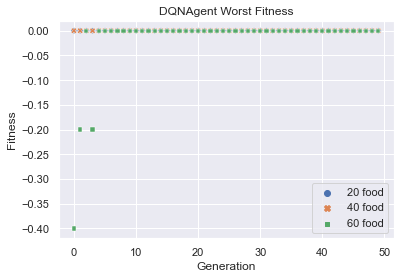

In [88]:
sns.set(style='darkgrid')
ax = sns.scatterplot(data=df_worst_fitness)
plt.title(agent_type + ' Worst Fitness')
# Set x-axis label
plt.xlabel('Generation')
# Set y-axis label
plt.ylabel('Fitness')
# Set legend
# plt.legend(title='Barriers', labels=['20', '30'])

print(raw_values[0]['env_params'])
# plt.savefig('Final/Plots/' + agent_type + file_name + '_worst_fitness.png')

{'coding_dict': {'empty': 0, 'agent': 1, 'bounds': 2, 'hive': 3, 'blockade': 4, 'food_start': 6}, 'N': 12, 'M': 12, 'max_food': 5, 'observation_radius': 1, 'steps': 300, 'spawn_rate': 2, 'pheromone': {'evaporation': 0.05, 'diffusion': 0.1, 'step': 0.1, 'step_if_food': 0.3, 'cap': 5}, 'grid': {'food': 40, 'blockade': 20}, 'env_actions': [(0, 0), (0, -1), (0, 1), (1, 0), (-1, 0)], 'rgb_coding': {0: [0, 0, 0], 1: [150, 0, 150], 2: [100, 100, 100], 3: [150, 150, 0], 4: [45, 0, 255], 5: [0, 255, 45], 6: (0, 250, 50), 7: (0, 245, 55), 8: (0, 240, 60), 9: (0, 235, 65), 10: (0, 230, 70), 11: (0, 225, 75), 12: (0, 220, 80), 13: (0, 215, 85), 14: (0, 210, 90)}}


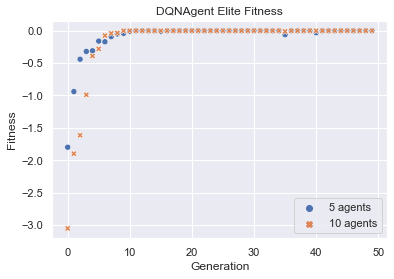

In [114]:
sns.set(style='darkgrid')
ax = sns.scatterplot(data=df_elite_fitness)
plt.title(agent_type + ' Elite Fitness')
# Set x-axis label
plt.xlabel('Generation')
# Set y-axis label
plt.ylabel('Fitness')

print(raw_values[0]['env_params'])
# plt.savefig('Final/Plots/' + agent_type + file_name + '_elite_fitness.png')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2, 0.0, -0.4, -2.0, -1.8, -1.2, -2.2, -1.0, -1.0, -1.2, -2.6, -1.6, -2.4, -1.6, -1.0, -1.4, -1.8, -1.8, -0.8, -2.4, 0.0, -3.4, -1.0, 0.0, 0.0, -1.2, -1.0, -3.0, -1.0, 0.0, -0.4, -2.6, 0.0, -1.2, -1.4, 0.0, -1.8, -3.0, -3.2, -1.6, -3.6, -4.2, 0.0, -0.4, 0.0, 0.0, -1.4, 0.0, -0.4, -1.0, -3.4, -1.2, -2.4, 0.0, -1.6, -0.6, -1.8, -1.2, -1.2, 0.0, -1.8, -3.2, -0.8, -0.6, 0.0, 0.0, -2.4, -1.0, -1.2, 0.0, -0.2, -0.6, -0.8, -0.8, -1.8, -1.8, -1.2, -1.4, -0.6, -2.8]


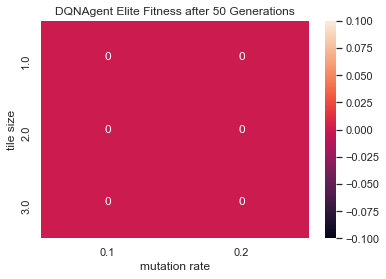

In [96]:
'''
    Heatmaps of tile_size x mutation
'''
randomAgent_files_heatmap_tile_mutation = [
    {'filename':'Final/GA_5RandomAgent_1tile_0.1mutation_40food_20blocks', 'tile':1, 'mutation':0.1},
    {'filename':'Final/GA_5RandomAgent_1tile_0.2mutation_40food_20blocks','tile':1, 'mutation':0.2},
    {'filename':'Final/GA_5RandomAgent_2tile_0.1mutation_40food_20blocks', 'tile':2, 'mutation':0.1},
    {'filename':'Final/GA_5RandomAgent_2tile_0.2mutation_40food_20blocks','tile':2, 'mutation':0.2},
    {'filename':'Final/GA_5RandomAgent_3tile_0.1mutation_40food_20blocks','tile':3, 'mutation':0.1},
    {'filename':'Final/GA_5RandomAgent_3tile_0.2mutation_40food_20blocks','tile':3, 'mutation':0.2}
]
swarmAgent_files_heatmap_tile_mutation = [
    {'filename':'Final/GA_5SwarmAgent_1tile_0.1mutation_40food_20blocks', 'tile':1, 'mutation':0.1},
    {'filename':'Final/GA_5SwarmAgent_1tile_0.2mutation_40food_20blocks', 'tile':1, 'mutation':0.2},
    {'filename':'Final/GA_5SwarmAgent_2tile_0.1mutation_40food_20blocks', 'tile':2, 'mutation':0.1},
    {'filename':'Final/GA_5SwarmAgent_2tile_0.2mutation_40food_20blocks', 'tile':2, 'mutation':0.2},
    {'filename':'Final/GA_5SwarmAgent_3tile_0.1mutation_40food_20blocks', 'tile':3, 'mutation':0.1},
    {'filename':'Final/GA_5SwarmAgent_3tile_0.2mutation_40food_20blocks', 'tile':3, 'mutation':0.2}
]
DQNAgent_files_heatmap_tile_mutation = [
    {'filename':'Final/GA_5DQNAgent_1tile_0.1mutation_40food_20blocks', 'tile':1, 'mutation':0.1},
    {'filename':'Final/GA_5DQNAgent_1tile_0.2mutation_40food_20blocks', 'tile':1, 'mutation':0.2},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_40food_20blocks', 'tile':2, 'mutation':0.1},
    {'filename':'Final/GA_5DQNAgent_2tile_0.2mutation_40food_20blocks', 'tile':2, 'mutation':0.2},
    {'filename':'Final/GA_5DQNAgent_3tile_0.1mutation_40food_20blocks', 'tile':3, 'mutation':0.1},
    {'filename':'Final/GA_5DQNAgent_3tile_0.2mutation_40food_20blocks', 'tile':3, 'mutation':0.2}
]

with open('Final/GA_5DQNAgent_1tile_0.1mutation_40food_20blocks', 'rb') as f:
    print(pickle.load(f)['fitness values'][49])

files_to_analyze = DQNAgent_files_heatmap_tile_mutation
df_heatmap_tile_mutation = pd.DataFrame(columns=['average elite fitness', 'tile size', 'mutation rate'])
for file in files_to_analyze:
    with open(file['filename'], 'rb') as f:
        temp_values = pickle.load(f)
        raw_fitness_values = temp_values['fitness values']
        # Add the average elite fitness of last generation to df 
        avg_elite_fitness = sum(raw_fitness_values[-1][:num_elite])/num_elite
        df_heatmap_tile_mutation = df_heatmap_tile_mutation.append({
            'average elite fitness': avg_elite_fitness, 
            'tile size': file['tile'], 
            'mutation rate': file['mutation']}, ignore_index=True)

sns.set(style='darkgrid')
plt.title('DQNAgent Elite Fitness after 50 Generations')
df_heatmap_tile_mutation = df_heatmap_tile_mutation.pivot('tile size', 'mutation rate', 'average elite fitness')
ax = sns.heatmap(df_heatmap_tile_mutation, annot=True)
plt.savefig('Final/Plots/DQNAgent_heatmap_tile_mutation.png')

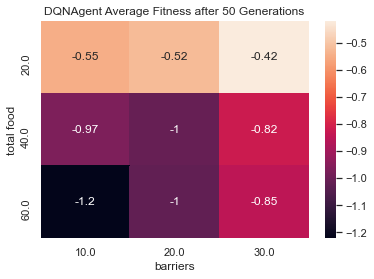

In [102]:
'''
    Heatmaps of food x blocks
'''
randomAgent_files_heatmap_food_blocks = [
    {'filename':'Final/GA_5RandomAgent_2tile_0.1mutation_20food_10blocks', 'food':20, 'blocks':10},
    {'filename':'Final/GA_5RandomAgent_2tile_0.1mutation_20food_20blocks','food':20, 'blocks':20},
    {'filename':'Final/GA_5RandomAgent_2tile_0.1mutation_20food_30blocks', 'food':20, 'blocks':30},
    {'filename':'Final/new_GA_5RandomAgent_2tile_0.1mutation_40food_10blocks','food':40, 'blocks':10},
    {'filename':'Final/new_GA_5RandomAgent_2tile_0.1mutation_40food_20blocks','food':40, 'blocks':20},
    {'filename':'Final/new_GA_5RandomAgent_2tile_0.1mutation_40food_30blocks','food':40, 'blocks':30},
    {'filename':'Final/GA_5RandomAgent_2tile_0.1mutation_60food_10blocks','food':60, 'blocks':10},
    {'filename':'Final/GA_5RandomAgent_2tile_0.1mutation_60food_20blocks','food':60, 'blocks':20},
    {'filename':'Final/GA_5RandomAgent_2tile_0.1mutation_60food_30blocks','food':60, 'blocks':30}
]
swarmAgent_files_heatmap_food_blocks = [
    {'filename':'Final/GA_5SwarmAgent_2tile_0.1mutation_20food_10blocks', 'food':20, 'blocks':10},
    {'filename':'Final/GA_5SwarmAgent_2tile_0.1mutation_20food_20blocks','food':20, 'blocks':20},
    {'filename':'Final/GA_5SwarmAgent_2tile_0.1mutation_20food_30blocks', 'food':20, 'blocks':30},
    {'filename':'Final/new_GA_5SwarmAgent_2tile_0.1mutation_40food_10blocks','food':40, 'blocks':10},
    {'filename':'Final/new_GA_5SwarmAgent_2tile_0.1mutation_40food_20blocks','food':40, 'blocks':20},
    {'filename':'Final/new_GA_5SwarmAgent_2tile_0.1mutation_40food_30blocks','food':40, 'blocks':30},
    {'filename':'Final/GA_5SwarmAgent_2tile_0.1mutation_60food_10blocks','food':60, 'blocks':10},
    {'filename':'Final/GA_5SwarmAgent_2tile_0.1mutation_60food_20blocks','food':60, 'blocks':20},
    {'filename':'Final/GA_5SwarmAgent_2tile_0.1mutation_60food_30blocks','food':60, 'blocks':30}
]
DQNAgent_files_heatmap_food_blocks = [
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_20food_10blocks', 'food':20, 'blocks':10},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_20food_20blocks','food':20, 'blocks':20},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_20food_30blocks', 'food':20, 'blocks':30},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_40food_10blocks','food':40, 'blocks':10},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_40food_20blocks','food':40, 'blocks':20},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_40food_30blocks','food':40, 'blocks':30},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_60food_10blocks','food':60, 'blocks':10},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_60food_20blocks','food':60, 'blocks':20},
    {'filename':'Final/GA_5DQNAgent_2tile_0.1mutation_60food_30blocks','food':60, 'blocks':30}
]

files_to_analyze = DQNAgent_files_heatmap_food_blocks
df_heatmap_tile_mutation = []
df_heatmap_tile_mutation = pd.DataFrame(columns=['average elite fitness', 'total food', 'barriers'])
for file in files_to_analyze:
    with open(file['filename'], 'rb') as f:
        temp_values = pickle.load(f)
        raw_fitness_values = temp_values['fitness values']
        # Add the average elite fitness of last generation to df 
#         avg_elite_fitness = sum(raw_fitness_values[49][:num_elite])/num_elite
        avg_fitness = sum(raw_fitness_values[49])/len(raw_fitness_values[49])
        df_heatmap_tile_mutation = df_heatmap_tile_mutation.append({
            'average elite fitness': avg_fitness, 
            'total food': file['food'], 
            'barriers': file['blocks']}, ignore_index=True)

sns.set(style='darkgrid')
plt.title('DQNAgent Average Fitness after 50 Generations')
df_heatmap_tile_mutation = df_heatmap_tile_mutation.pivot('total food', 'barriers', 'average elite fitness')
ax = sns.heatmap(df_heatmap_tile_mutation, annot=True)
plt.savefig('Final/Plots/DQNAgent_heatmap_avgfitness_food_blocks.png')